# Parameterizations

In [8]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pyqg
import json
import fsspec
import pickle
import os

#from pyqg_parameterization_benchmarks.neural_networks import FCNNParameterization
#from pyqg_parameterization_benchmarks.utils import energy_budget_figure
#from pyqg_parameterization_benchmarks.neural_networks import FullyCNN


%matplotlib inline
plt.rcParams.update({'font.size': 13})
%run nnClass.ipynb
%run utils.ipynb
%run forcing_data.ipynb

### ––– Fully Convolutional Neural Networks –––
##### Create new FCNN parameterization

In [51]:
in_q = ['q']
tar_q_tot = ['q_forcing_total']

fcnn_q_qtot = FullyCNN(inputs=in_q, targets=tar_q_tot)

In [61]:
eddy_forcing_data = generate_forcing_data()
for i,k in enumerate(eddy_forcing_data):
    eddy_forcing_data[i]['q_forcing_total'] = eddy_forcing_data[i].dqdt_bar - eddy_forcing_data[i].dqbar_dt

INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 1000, Time: 3.60e+06, KE: 1.33e-07, CFL: 0.023
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 2000, Time: 7.20e+06, KE: 1.51e-07, CFL: 0.023
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 3000, Time: 1.08e+07, KE: 1.95e-07, CFL: 0.023
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 4000, Time: 1.44e+07, KE: 2.65e-07, CFL: 0.023
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 5000, Time: 1.80e+07, KE: 3.78e-07, CFL: 0.023
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 6000, Time: 2.16e+07, KE: 5.64e-07, CFL: 0.023
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 7000, Time: 2.52e+07, KE: 8.72e-07, CFL: 0.023
INFO:  Logger i

INFO:  Logger initialized
INFO: Step: 60000, Time: 2.16e+08, KE: 5.74e-04, CFL: 0.206
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 61000, Time: 2.20e+08, KE: 5.83e-04, CFL: 0.217
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 62000, Time: 2.23e+08, KE: 5.56e-04, CFL: 0.201
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 63000, Time: 2.27e+08, KE: 5.65e-04, CFL: 0.205
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 64000, Time: 2.30e+08, KE: 5.68e-04, CFL: 0.215
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 65000, Time: 2.34e+08, KE: 5.55e-04, CFL: 0.216
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: Step: 66000, Time: 2.38e+08, KE: 5.71e-04, CFL: 0.204
INFO:  Logger initialized
INFO:  Logger initialized
INFO:  Logger initialized
INFO: St

In [53]:
fcnn_q_qtot_param = FCNNParameterization('./models/fcnn_q_qtot')

In [62]:
fcnn_q_qtot_param.train_on(dataset = eddy_forcing_data[0], directory = './models/fcnn_q_qtot', inputs=in_q, targets=tar_q_tot)

Loss after Epoch 1: 1.1524572968482971
Loss after Epoch 2: 0.8771699965000153
Loss after Epoch 3: 0.7445433437824249
Loss after Epoch 4: 0.7062424123287201
Loss after Epoch 5: 0.623229593038559
Loss after Epoch 6: 0.5640398263931274
Loss after Epoch 7: 0.5118512809276581
Loss after Epoch 8: 0.5379466116428375
Loss after Epoch 9: 0.45858514308929443
Loss after Epoch 10: 0.4018825888633728
Loss after Epoch 11: 0.40170980989933014
Loss after Epoch 12: 0.35844290256500244
Loss after Epoch 13: 0.32363349199295044
Loss after Epoch 14: 0.3113888055086136
Loss after Epoch 15: 0.303061842918396
Loss after Epoch 16: 0.2688567638397217
Loss after Epoch 17: 0.2688556909561157
Loss after Epoch 18: 0.24712437391281128
Loss after Epoch 19: 0.2284368947148323
Loss after Epoch 20: 0.22565430402755737
Loss after Epoch 21: 0.2187926024198532
Loss after Epoch 22: 0.20471419394016266
Loss after Epoch 23: 0.19915272295475006
Loss after Epoch 24: 0.1843201145529747
Loss after Epoch 25: 0.18191955983638763
Lo

In [70]:
fcnn_q_qtot_param.models

[]

In [63]:
preds_q_qtot = fcnn_q_qtot_param.test_offline(eddy_forcing_data[0]) # this should return (near) 100 accuracy cuz its trained on this dataset...

ZeroDivisionError: division by zero

---
### ––– DEBUGGING SECTION –––
Existing code below for testing purposes

##### Load FCNN parameterization to check structure
- trained on $q \to S_{qtot}$ with operator 1

In [49]:
param = FCNNParameterization('../pyqg_parameterization_benchmarks/models/fcnn_q_to_Sqtot1')

# Print out a summary of its architecture -- note the circular padding,
# which was particularly important for performance.
param.models[0]

FullyCNN(
  (0): Conv2d(2, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), padding_mode=circular)
  (1): ReLU()
  (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Conv2d(128, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2), padding_mode=circular)
  (4): ReLU()
  (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
  (7): ReLU()
  (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
  (10): ReLU()
  (11): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=circular)
  (13): ReLU()
  (14): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True

##### Load a forcing dataset 

In [23]:
def get_dataset(path, base='datasets'):
    mapper = fsspec.get_mapper(f"{base}/{path}.zarr")
    return xr.open_zarr(mapper, consolidated=True)

In [24]:
eddy_forcing1 = get_dataset('eddy/forcing1').isel(run=0).load()
eddy_forcing1['q_forcing_total'] = eddy_forcing1.dqdt_bar - eddy_forcing1.dqbar_dt

##### Check input/output files

In [25]:
with open('../pyqg_parameterization_benchmarks/models/fcnn_q_to_Sqtot1/models/0/inputs.pkl', 'rb') as f:
    inputs = pickle.load(f)
with open('../pyqg_parameterization_benchmarks/models/fcnn_q_to_Sqtot1/models/0/targets.pkl', 'rb') as f:
    targets = pickle.load(f)
    
print(inputs)
print(targets)

model_dir = '../pyqg_parameterization_benchmarks/models/fcnn_q_to_Sqtot1/models/0'
param = FullyCNN.load(model_dir)
inputs = param.extract_inputs(eddy_forcing1)
targets = param.extract_targets(eddy_forcing1)

print(inputs.shape)
print(targets.shape)

[('q', 0), ('q', 1)]
[('q_forcing_total', 0)]
(87, 2, 64, 64)
(87, 1, 64, 64)


In [26]:
def mse(self, inputs, targets, **kw):
    y_true = targets.reshape(-1, np.prod(targets.shape[1:]))
    print(y_true.shape)
    y_pred = self.predict(inputs).reshape(-1, np.prod(targets.shape[1:]))
    print(y_pred.shape)
    return np.mean(np.sum((y_pred - y_true)**2, axis=1))

In [27]:
mse(param, eddy_forcing1, targets, **json.loads(eddy_forcing1.pyqg_params))

(87, 4096)
(64, 1, 64, 64)
(23, 1, 64, 64)
(87, 4096)


2.2028072e-20

##### Offline Testing

In [134]:
preds = param.test_offline(eddy_forcing1)

In [ ]:
# plot helpers 

def imshow(arr):
    plt.imshow(arr, vmin=0, vmax=1, cmap='inferno')
    mean = arr.mean().data
    plt.text(32, 32, f"{mean:.2f}", color=('white' if mean<0.75 else 'black'),
             fontweight='bold', ha='center', va='center', fontsize=16)
    plt.xticks([]); plt.yticks([])
    
def colorbar(label):
    plt.colorbar().set_label(label, fontsize=16,rotation=0,ha='left',va='center')

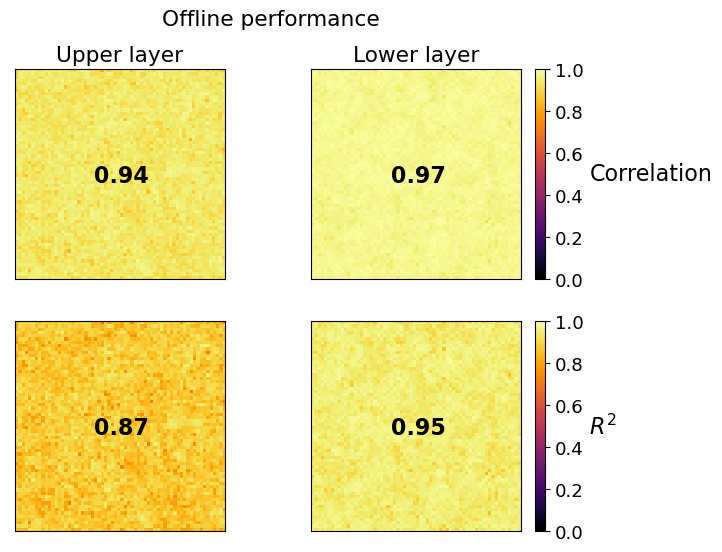

In [135]:
plt.figure(figsize=(7.6,6)).suptitle("Offline performance")

for z in [0,1]:
    plt.subplot(2,2,z+1,title=f"{['Upper','Lower'][z]} layer")
    imshow(preds.q_forcing_total_spatial_correlation.isel(lev=z))
    if z: colorbar("Correlation")
    
for z in [0,1]:
    plt.subplot(2,2,z+3)
    imshow(preds.q_forcing_total_spatial_skill.isel(lev=z))
    if z: colorbar("$R^2$")

##### Online testing

In [136]:
%%time
hires = get_dataset('eddy/high_res').isel(run=0)
lores = get_dataset('eddy/low_res').isel(run=0)
param_run = param.run_online(**json.loads(eddy_forcing1.pyqg_params))

INFO:  Logger initialized
INFO: Step: 1000, Time: 3.60e+06, KE: 5.46e-07, CFL: 0.007
INFO: Step: 2000, Time: 7.20e+06, KE: 3.83e-07, CFL: 0.007
INFO: Step: 3000, Time: 1.08e+07, KE: 5.29e-07, CFL: 0.007
INFO: Step: 4000, Time: 1.44e+07, KE: 7.22e-07, CFL: 0.007
INFO: Step: 5000, Time: 1.80e+07, KE: 9.90e-07, CFL: 0.006
INFO: Step: 6000, Time: 2.16e+07, KE: 1.45e-06, CFL: 0.007
INFO: Step: 7000, Time: 2.52e+07, KE: 2.09e-06, CFL: 0.007
INFO: Step: 8000, Time: 2.88e+07, KE: 3.14e-06, CFL: 0.007
INFO: Step: 9000, Time: 3.24e+07, KE: 4.97e-06, CFL: 0.007
INFO: Step: 10000, Time: 3.60e+07, KE: 8.05e-06, CFL: 0.007
INFO: Step: 11000, Time: 3.96e+07, KE: 1.31e-05, CFL: 0.008
INFO: Step: 12000, Time: 4.32e+07, KE: 2.16e-05, CFL: 0.009
INFO: Step: 13000, Time: 4.68e+07, KE: 3.54e-05, CFL: 0.011
INFO: Step: 14000, Time: 5.04e+07, KE: 5.73e-05, CFL: 0.014
INFO: Step: 15000, Time: 5.40e+07, KE: 8.98e-05, CFL: 0.020
INFO: Step: 16000, Time: 5.76e+07, KE: 1.27e-04, CFL: 0.026
INFO: Step: 17000, Time

CPU times: user 1h 36min 32s, sys: 5min 21s, total: 1h 41min 54s
Wall time: 2h 18min 14s


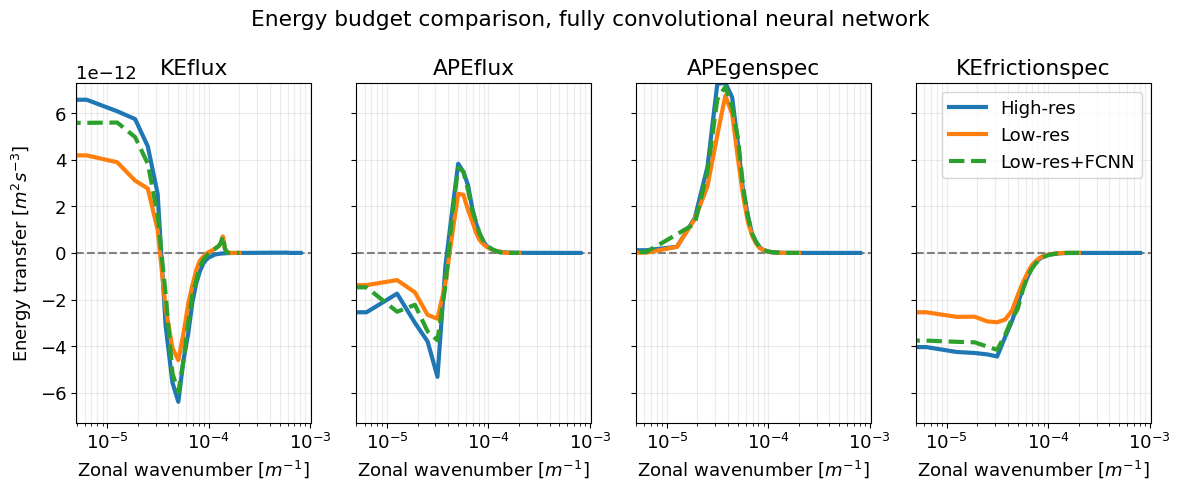

In [137]:
eddy_sims = [(hires, 'High-res'),(lores, 'Low-res'),(param_run,'Low-res+FCNN')]
fig = energy_budget_figure(eddy_sims)
fig.suptitle("Energy budget comparison, fully convolutional neural network")
plt.tight_layout()
plt.show()

Raw data snapshots just to confirm everything looks ok:

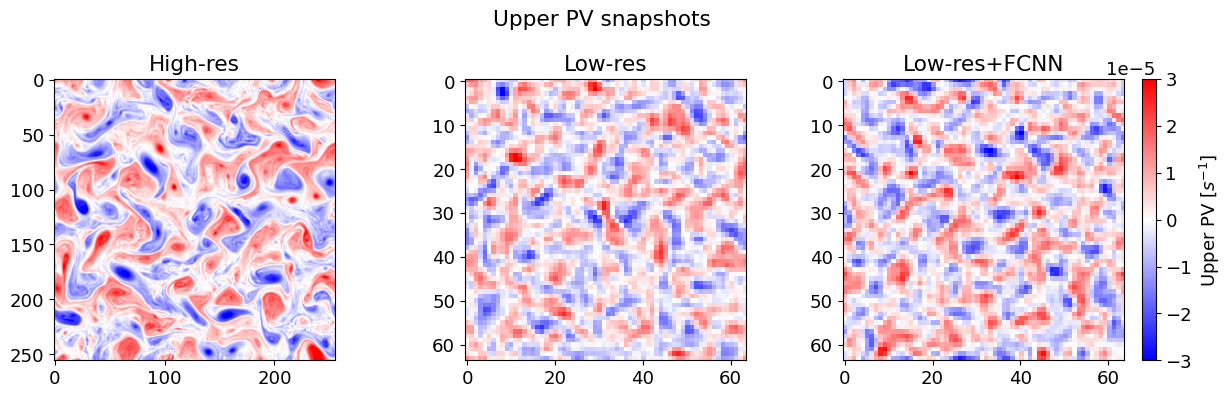

In [138]:
plt.figure(figsize=(13,4)).suptitle("Upper PV snapshots")
for i, (m, label) in enumerate(eddy_sims):
    plt.subplot(1,3,i+1, title=label)
    plt.imshow(m.q.isel(lev=0,time=-1), cmap='bwr', vmin=-3e-5, vmax=3e-5)
plt.colorbar(label="Upper PV [$s^{-1}$]")
plt.tight_layout()

The FCNN-parameterized model seems to have larger overall values for the upper PV. We can also confirm this by looking at marginal distributions:

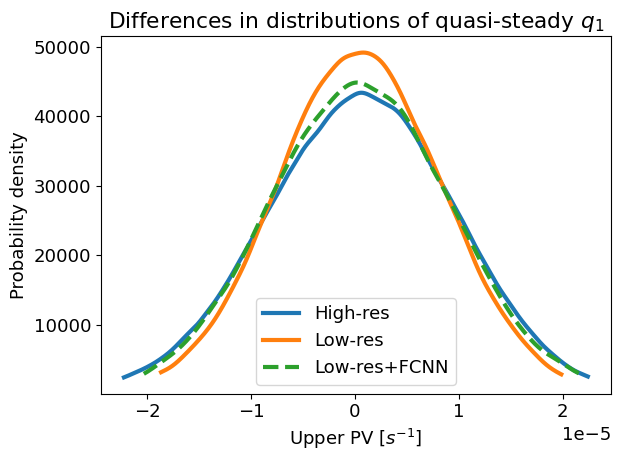

In [139]:
from scipy.stats import gaussian_kde
plt.title("Differences in distributions of quasi-steady $q_1$")
for i, (m, label) in enumerate(eddy_sims):
    data = m.q.isel(lev=0,time=slice(-20,None)).data.ravel()
    dist = gaussian_kde(data)
    x = np.linspace(*np.percentile(data, [1,99]), 1000)
    plt.plot(x, dist(x), label=label, lw=3, ls=('--' if 'FCNN' in label else '-'))
plt.legend()
plt.xlabel("Upper PV [$s^{-1}$]")
plt.ylabel("Probability density")
plt.tight_layout()

The FCNN's distribution is much, much closer. In the paper, we quantify this with Wasserstein distance over a much larger set of variables.

##### Testing generalization

Now, although our FCNN performs well in a context that matches its training data, neural networks often have trouble generalizing to new domains. Let's try it with a second "jet" configuration:

In [140]:
# This dataset has the same distribution as the FCNN's training data, but is not something the FCNN has seen
# (we regenerated the dataset after pyqg changes which standardized/saved more diagnostics).
jet_forcing1 = get_dataset('jet/forcing1').isel(run=0).load()
jet_forcing1['q_forcing_total'] = jet_forcing1.dqdt_bar - jet_forcing1.dqbar_dt

In [141]:
preds2 = param.test_offline(jet_forcing1)

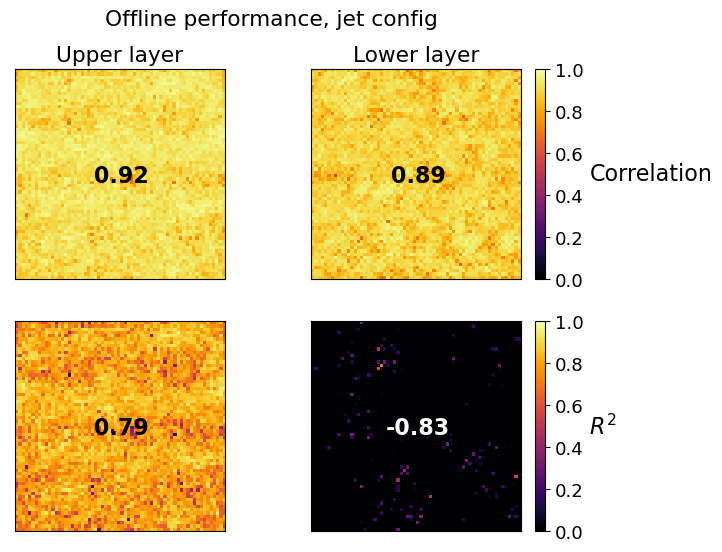

In [142]:
plt.figure(figsize=(7.6,6)).suptitle("Offline performance, jet config")

for z in [0,1]:
    plt.subplot(2,2,z+1,title=f"{['Upper','Lower'][z]} layer")
    imshow(preds2.q_forcing_total_spatial_correlation.isel(lev=z))
    if z: colorbar("Correlation")
    
for z in [0,1]:
    plt.subplot(2,2,z+3)
    imshow(preds2.q_forcing_total_spatial_skill.isel(lev=z))
    if z: colorbar("$R^2$")

Although the FCNN's correlation is still reasonably high, its $R^2$ drops significantly, going negative in the lower layer. Note that across different random restarts, FCNN behavior varies here (some models have negative $R^2$s in both layers, even going down to -5 or lower).

Let's see what happens online:

In [143]:
hires2 = get_dataset('jet/high_res').isel(run=0)
lores2 = get_dataset('jet/low_res').isel(run=0)
param_run2 = param.run_online(**json.loads(jet_forcing1.pyqg_params))

INFO:  Logger initialized


KeyboardInterrupt: 